In [1]:
%load_ext autoreload    
%autoreload 2
from plot import *

In [2]:
# results_path = "../../results/sgd-steps"
# results_path = "../../results/move-32-features"
# results_path = "../../results/mnk"
# results_path = "../../results/mnk-10"
# results_path = "../../results/nsga-mnk"
# results_path = "../../results/nsga-iii-mnk"
# results_path = "../../results/l2-reg"
results_path = "../../results/fourier-features"
# results_path = "../../results/fourier-features-control"
# results_path = "../../results/sgd-lr-mutate-rate"
# results_path = "../../results/hillclimber"
# results_path = "../../results/hillclimber_bloat_prune/"
show=True

In [3]:
# pretty_names = {
#     "000_steps_" : "0 steps",
#     "016_steps_" : "16 steps",
#     "100_steps_" : "100 steps",
#     "1000_steps_" : "1000 steps",
    
# }
pretty_names = {
 
    
}

In [4]:

save_path = os.path.join(results_path, "plots")
if os.path.exists(save_path):
    os.makedirs(os.path.join(save_path), exist_ok=True)

metrics = [
    "evals_by_batch",
    "normed_fitness_by_batch",
    "pruned_cxs",
    # "offspring_by_batch",
    # "fitness_by_batch",
    # "lr_by_batch",
    "cx_by_batch",
    "nodes_by_batch",

]
results = read_tensor_results(results_path, metrics, max_runs=None)

Loading:   0%|          | 0/5 [00:00<?, ?it/s]

Merging: 100%|██████████| 514/514 [00:04<00:00, 118.58it/s]


In [5]:
results

,batch,condition,cx_by_batch,evals_by_batch,nodes_by_batch,normed_fitness_by_batch,pruned_cxs,run,target
0,0,000_features,35.0,1472.0,10.0,0.459207,8.0,run_1986378594621592046,data/sunrise.png
1,1,000_features,34.0,2840.0,9.0,0.482158,8.0,run_1986378594621592046,data/sunrise.png
2,2,000_features,34.0,4184.0,9.0,0.487651,8.0,run_1986378594621592046,data/sunrise.png
3,3,000_features,34.0,5952.0,9.0,0.483524,8.0,run_1986378594621592046,data/sunrise.png
4,4,000_features,34.0,7248.0,9.0,0.504714,8.0,run_1986378594621592046,data/sunrise.png
...,...,...,...,...,...,...,...,...,...
9544,93,064_features,315.0,96344.0,19.0,0.548044,8.0,run_6170467830959706606,data/sunrise.png
9545,94,064_features,315.0,97504.0,19.0,0.547284,8.0,run_6170467830959706606,data/sunrise.png
9546,95,064_features,348.0,98504.0,19.0,0.546726,8.0,run_6170467830959706606,data/sunrise.png
9547,96,064_features,348.0,99576.0,19.0,0.546320,8.0,run_6170467830959706606,data/sunrise.png


In [6]:
# undo cumsum for conditions including (NSGA-III)
results = results.groupby("run").apply(lambda x: x.apply(lambda y: y - y.shift(1) if y.name == "evals_by_batch" else y) if "NSGA-III" in x['condition'].values[0] else x)
results = results.groupby("run").apply(lambda x: x.apply(lambda y: y.fillna(0) if y.name == "evals_by_batch" else y))



/tmp/ipykernel_12882/2841905548.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  results = results.groupby("run").apply(lambda x: x.apply(lambda y: y - y.shift(1) if y.name == "evals_by_batch" else y) if "NSGA-III" in x['condition'].values[0] else x)
/tmp/ipykernel_12882/2841905548.py:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, us

In [7]:
def sort_conditions_numerically(list_of_conditions):
    return sorted(list_of_conditions, key=lambda x: int(x.split("_")[0]) if x.split("_")[0].isdigit() else 0)
results.condition = pd.Categorical(results.condition, categories=sort_conditions_numerically(results.condition.unique()), ordered=True)

In [8]:
# rename conditions
results['condition_path'] = results.condition.copy()
# results.condition = results.condition.apply(lambda x: pretty_names[x])


In [9]:
print(results.condition.unique())

['000_features', '004_features', '016_features', '064_features']
Categories (4, object): ['000_features' < '004_features' < '016_features' < '064_features']


In [10]:
# max evals by condition
max_evals = results.groupby(["condition_path", "run"]).max().reset_index()
max_evals

,condition_path,run,batch,condition,cx_by_batch,evals_by_batch,nodes_by_batch,normed_fitness_by_batch,pruned_cxs,target
0,000_features,run_10258066185983169006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000_features,run_10431192108616978926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000_features,run_10431545111979037166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000_features,run_10435068960846713326,110.0,000_features,80.0,100536.0,28.0,0.408649,8.0,data/dolphin.png
4,000_features,run_10878320452061172206,86.0,000_features,77.0,100520.0,28.0,0.553118,8.0,data/sunrise.png
...,...,...,...,...,...,...,...,...,...,...
407,064_features,run_8314273810127327726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
408,064_features,run_8513552819418632686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
409,064_features,run_8547049939375952366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
410,064_features,run_928917273653809646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
results

,batch,condition,cx_by_batch,evals_by_batch,nodes_by_batch,normed_fitness_by_batch,pruned_cxs,run,target,condition_path
0,0,000_features,35.0,1472.0,10.0,0.459207,8.0,run_1986378594621592046,data/sunrise.png,000_features
1,1,000_features,34.0,2840.0,9.0,0.482158,8.0,run_1986378594621592046,data/sunrise.png,000_features
2,2,000_features,34.0,4184.0,9.0,0.487651,8.0,run_1986378594621592046,data/sunrise.png,000_features
3,3,000_features,34.0,5952.0,9.0,0.483524,8.0,run_1986378594621592046,data/sunrise.png,000_features
4,4,000_features,34.0,7248.0,9.0,0.504714,8.0,run_1986378594621592046,data/sunrise.png,000_features
...,...,...,...,...,...,...,...,...,...,...
9544,93,064_features,315.0,96344.0,19.0,0.548044,8.0,run_6170467830959706606,data/sunrise.png,064_features
9545,94,064_features,315.0,97504.0,19.0,0.547284,8.0,run_6170467830959706606,data/sunrise.png,064_features
9546,95,064_features,348.0,98504.0,19.0,0.546726,8.0,run_6170467830959706606,data/sunrise.png,064_features
9547,96,064_features,348.0,99576.0,19.0,0.546320,8.0,run_6170467830959706606,data/sunrise.png,064_features


In [12]:
for target in results.target.unique():
    print(target)
    for cond in results.condition.sort_values().unique():
        print("\t", cond, end='\t\t')
        # count runs with target
        print(results[(results.target==target ) & (results.condition==cond)].run.unique().shape[0])

data/sunrise.png
	 000_features		7
	 004_features		7
	 016_features		6
	 064_features		5
data/apple.png
	 000_features		7
	 004_features		7
	 016_features		7
	 064_features		5
data/skull.png
	 000_features		7
	 004_features		7
	 016_features		7
	 064_features		5
data/dolphin.png
	 000_features		7
	 004_features		7
	 016_features		7
	 064_features		5


In [13]:
# print the run with the most evals
results.groupby(["condition", "run"]).max().reset_index().sort_values("evals_by_batch", ascending=False).head(1)

,condition,run,batch,cx_by_batch,evals_by_batch,nodes_by_batch,normed_fitness_by_batch,pruned_cxs,target,condition_path
217,016_features,run_13698979707618988526,63.0,268.0,102176.0,27.0,0.587258,9.0,data/sunrise.png,016_features


In [14]:
plot_results = results.copy()
if "NSGA-III" in plot_results.condition.unique():
    plot_results['condition'] = plot_results['condition'].apply(lambda x: fr"$\rho$: {float(x.split('_')[1]):.2f} M: {x.split('_')[2]} N: {x.split('_')[3]} K: {x.split('_')[4]} {''.join(x.split('_')[5:])}")
    # sort by condition
    # plot_results['condition'] = pd.Categorical(plot_results['condition'], categories=sorted(plot_results['condition'].unique(), key=lambda x: float(x.split(' ')[3]), reverse=True), ordered=True)
            

    sns.set_palette("tab10")
    sns.lineplot(plot_results, x="evals_by_batch", y="normed_fitness_by_batch", hue="condition", legend='full')
    plt.title("RMNK")
    plt.xlabel("Evaluations")
    plt.ylabel("Fitness")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

[Errno 2] No such file or directory: '../../results/fourier-features/plots/normed_fitness_by_batch_v_evals_avg_avg.png'


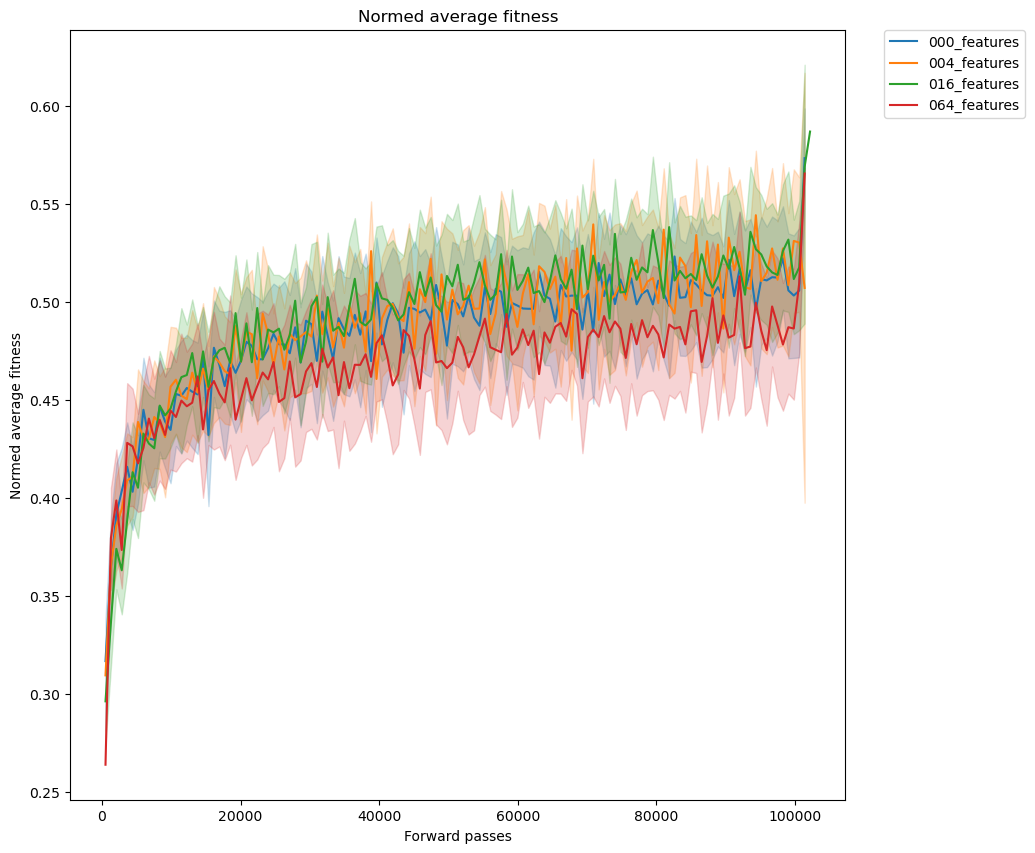

In [19]:
# raise Exception("stop here")
try:
    # plot_vs_evals(results, 'normed_fitness_by_batch', save_path, show)
    # plot_vs_evals(results, 'normed_fitness_by_batch', save_path, show, mean_by_target=True, smooth=0.95, title="Normed average fitness by number of SGD steps", y_label="Normed average fitness")
    plot_vs_evals(results, 'normed_fitness_by_batch', save_path, show, mean_by_target=True, smooth=0.0, title="Normed average fitness", y_label="Normed average fitness")
except Exception as e:
    print(e)
    pass

In [16]:
if 'fitness_by_batch' in results.columns:
    # plot_vs_evals(results, 'normed_fitness_by_batch', save_path, show)
    # plot_vs_evals(results, 'normed_fitness_by_batch', save_path, show, mean_by_target=True, smooth=0.95, title="Normed average fitness by number of SGD steps", y_label="Normed average fitness")
    plot_vs_evals(results, 'fitness_by_batch', save_path, show, mean_by_target=True, smooth=0.95, title="Normed average fitness", y_label="Normed average fitness")

In [17]:
if 'lr_by_batch' in results.columns:
    plot_vs_evals(results, 'lr_by_batch', save_path, show, mean_by_target=True, smooth=0.95, title="LR", y_label="LR")


FileNotFoundError: [Errno 2] No such file or directory: '../../results/fourier-features/plots/cx_by_batch_v_evals_avg_avg.png'

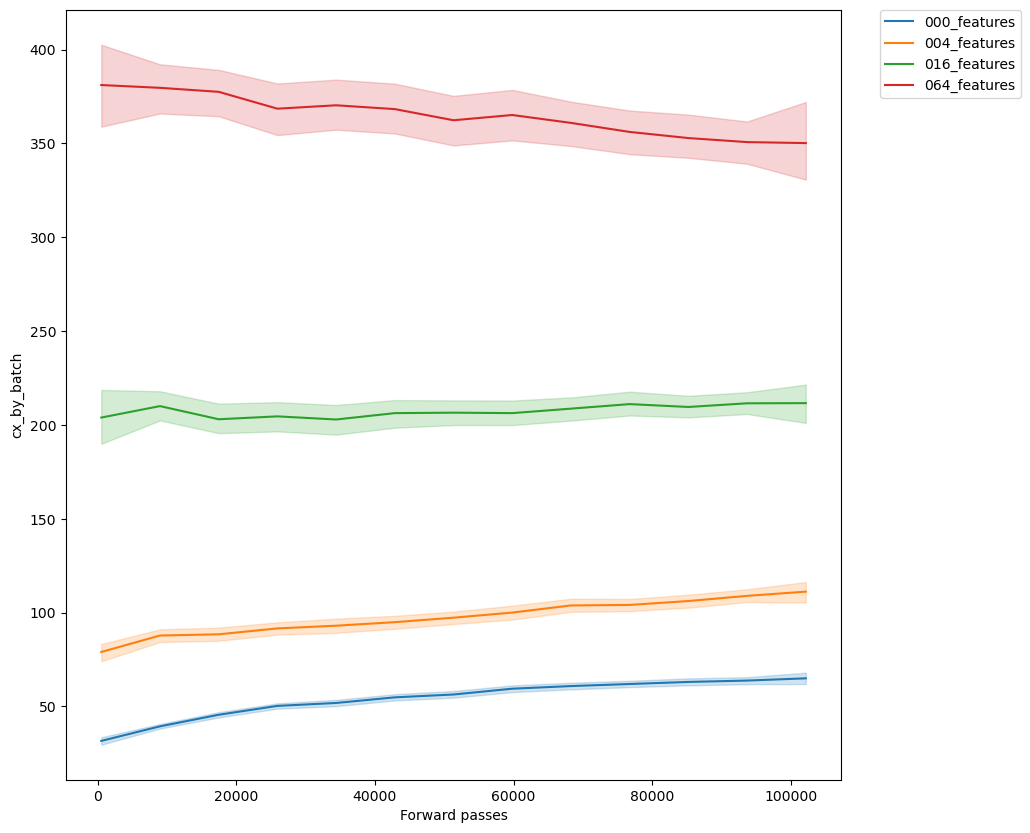

In [18]:
if 'cx_by_batch' in results.columns:
    # plot_vs_evals(results, 'cx_by_batch', save_path, show)
    plot_vs_evals(results, 'cx_by_batch', save_path, show, mean_by_target=True, smooth=0.9)

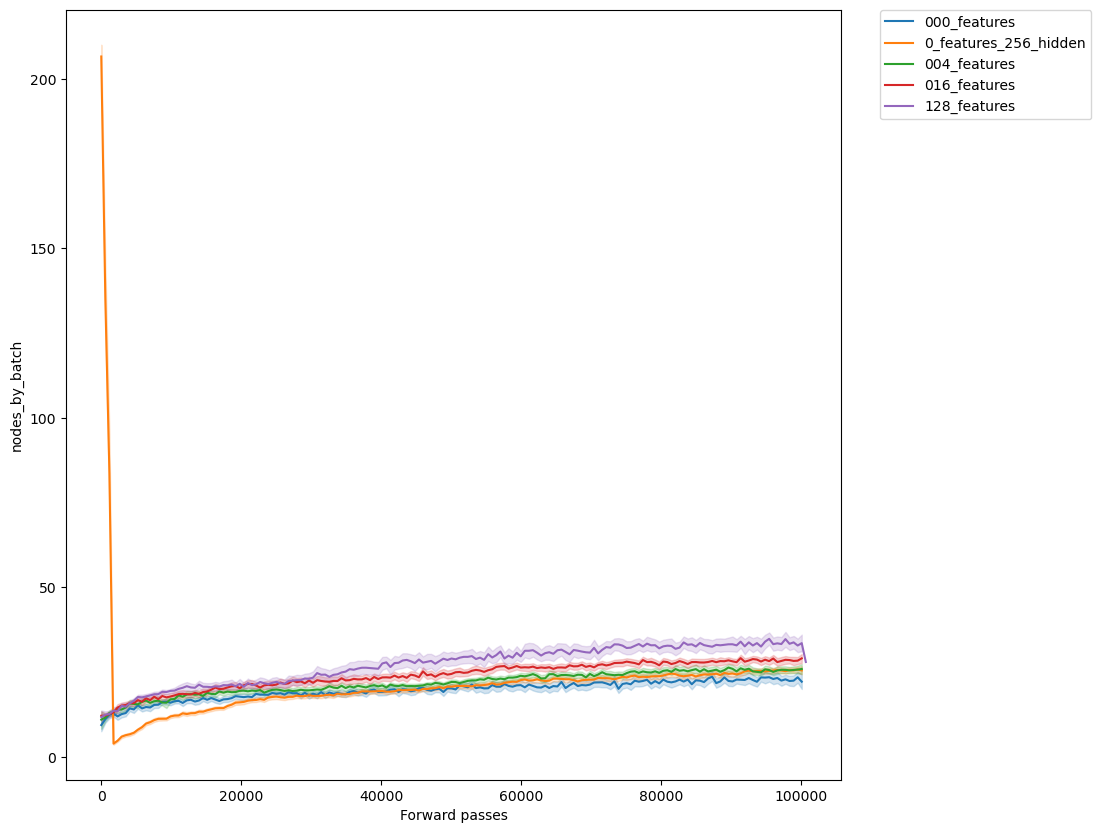

In [ ]:
if 'nodes_by_batch' in results.columns:
    # plot_vs_evals(results, 'nodes_by_batch', save_path, show)
    plot_vs_evals(results, 'nodes_by_batch', save_path, show, mean_by_target=True, smooth=0.9)

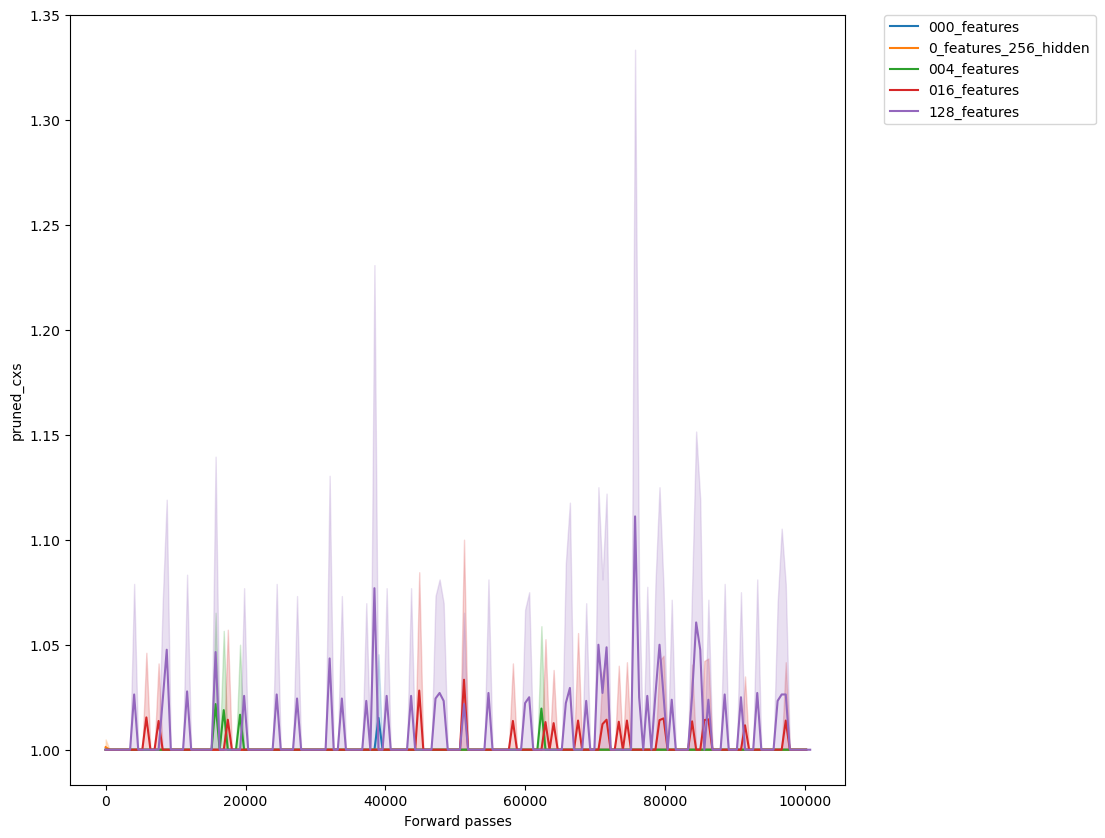

In [ ]:
if 'pruned_cxs' in results.columns:
    # plot_vs_evals(results, 'pruned_cxs', save_path, show)
    plot_vs_evals(results, 'pruned_cxs', save_path, show, mean_by_target=True, smooth=0.9)

   batch              condition  cx_by_batch  evals_by_batch  nodes_by_batch  \
0     93  0_features_128_hidden        782.0         75488.0           159.0   
1    104  0_features_128_hidden        876.0         84480.0           170.0   

   normed_fitness_by_batch  pruned_cxs                      run  \
0                 0.450624         8.0  run_1165030051282686446   
1                 0.637119         8.0  run_2107363571290345966   

             target         condition_path  
0  data/dolphin.png  0_features_128_hidden  
1    data/skull.png  0_features_128_hidden  


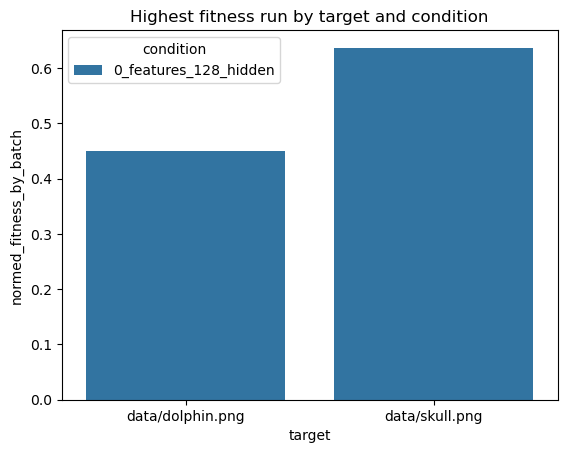

In [ ]:
highest_fit_runs_by_target_and_cond = results.groupby(['target', 'condition']).apply(lambda x: x.sort_values('normed_fitness_by_batch', ascending=False).iloc[0]).reset_index(drop=True)

print(highest_fit_runs_by_target_and_cond)


sns.barplot(data=highest_fit_runs_by_target_and_cond, x='target', y='normed_fitness_by_batch', hue='condition')
plt.title("Highest fitness run by target and condition")
plt.show()


In [ ]:
import sys
sys.path.append("../")
from move_config import resize_image



In [ ]:
import re
cond_dir = os.path.join(results_path, "conditions")

def load_images(images, results_path, prefix="best"):
     for target in results.target.unique():
        images[target] = {}
        for cond in results.condition.sort_values().unique():
            vals = highest_fit_runs_by_target_and_cond[(highest_fit_runs_by_target_and_cond.target==target) & (highest_fit_runs_by_target_and_cond.condition==cond)].run.values
            if len(vals) == 0:
                continue
            run = vals[0]
            condition_path = results[(results.target==target) & (results.condition==cond)]['condition_path'].values[0]
            image_path = os.path.join(results_path, f"{cond_dir}/{condition_path}/{run}/images")
            best_regex = re.compile(f"{prefix}_[0-9]*.png")
            best_files = [f for f in os.listdir(image_path) if best_regex.match(f)]
            images[target][cond] = [os.path.join(image_path, f) for f in best_files]

In [ ]:
from IPython.display import display
from PIL import Image

print(results)

def plot_images(prefix='best'):
    images = {}
    load_images(images, results_path, prefix)
            
    # plot as a grid where each column is a condition and each row is a target
    fig, axes = plt.subplots(nrows=(results.target.unique()).shape[0], ncols=(results.condition.unique()).shape[0]+1, figsize=(15, 10))
    
    tars = results.target.unique()
    
    # add the initial target image to the first column
    tar_images = [os.path.join("../", f"{t}") for t in tars]
    
    for i, img in enumerate(tar_images):
        ax = axes[i][0]
        ax.set_title(f"Target")
        ax.axis('off')
        img =Image.open(img)
        # numpy
        img = np.array(img)/255
        img = resize_image(img, (100,100), 'cpu')
        
        ax.imshow(img)
    
    for i, tar in enumerate(tars):
        for j, cond in enumerate(results.condition.sort_values().unique()):
            ax = axes[i][j+1]
            ax.set_title(f"{cond}")
            ax.axis('off')
            if tar not in images or cond not in images[tar] or len(images[tar][cond]) == 0:
                continue
            ax.imshow(Image.open(images[tar][cond][0]))
    
    
    plt.tight_layout()
    plt.show()

    

      batch              condition  cx_by_batch  evals_by_batch  \
0         0  0_features_128_hidden        796.0           808.0   
1         1  0_features_128_hidden        801.0          1616.0   
2         2  0_features_128_hidden        804.0          2424.0   
3         3  0_features_128_hidden        813.0          3232.0   
4         4  0_features_128_hidden        811.0          4040.0   
...     ...                    ...          ...             ...   
1003    120  0_features_128_hidden        828.0         96992.0   
1004    121  0_features_128_hidden        828.0         97800.0   
1005    122  0_features_128_hidden        828.0         98608.0   
1006    123  0_features_128_hidden        799.0         99416.0   
1007    124  0_features_128_hidden        828.0        100224.0   

      nodes_by_batch  normed_fitness_by_batch  pruned_cxs  \
0              144.0                 0.433328         8.0   
1              144.0                 0.448272         8.0   
2           

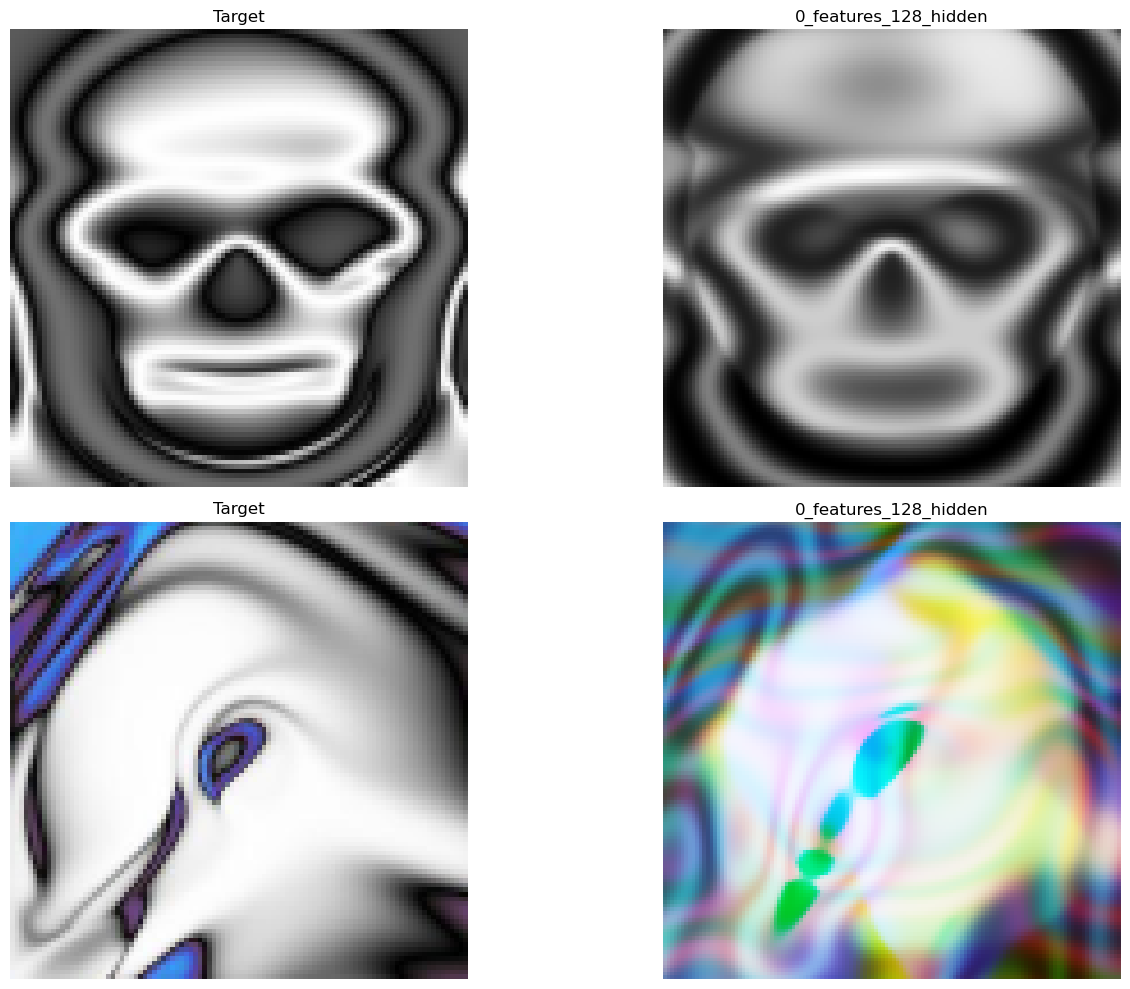

In [ ]:
try:
    plot_images('best')
except TypeError as e:
    # no images
    pass

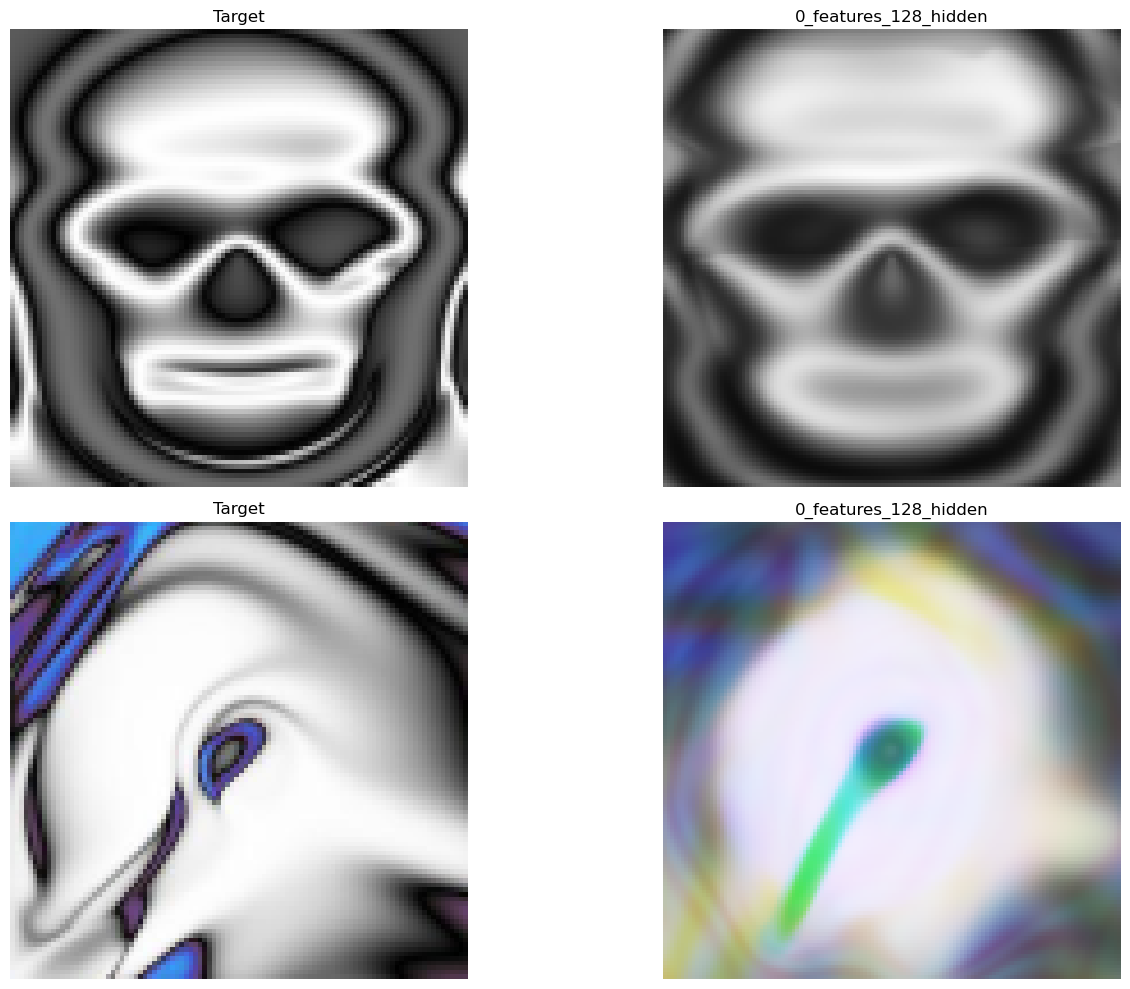

In [ ]:
try:
    plot_images('avg')
except TypeError as e:
    # no images
    pass

In [ ]:
# plot best image from every run for a given condition and target
def plot_cond_tar_images(condition, target, prefix='best'):
    filtered_results = results[(results.target==target) & (results.condition==condition)]
    print(filtered_results.run.unique())
    # take only the final image from each run
    filtered_results = filtered_results.groupby('run').apply(lambda x: x.sort_values('evals_by_batch').iloc[-1]).reset_index(drop=True)
    print(filtered_results)
    if filtered_results.shape[1] == 0:
        print("No results for that condition and target")
        return
    cols = 4
    rows = int(np.ceil(filtered_results.shape[1]/cols))
    print(rows, cols)
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 10))
    for i, (_, row) in enumerate(filtered_results.iterrows()):
        ax = axes[int(np.floor(i/cols))][i%cols]
        ax.set_title(f"Run {row.run} fit: {row.normed_fitness_by_batch:.2f}")
        ax.axis('off')
        regex = re.compile(f"{prefix}_[0-9]*.png")
        # images = os.path.join(f"{cond_dir}/{row.condition_path}/{row.run}/images")
        images = os.path.join(f"{cond_dir}/{row.condition_path}/{row.run}/images")
        print(images)
        try:
            best_files = [f for f in os.listdir(images) if regex.match(f)]
            img = Image.open(os.path.join(images, best_files[0]))
            ax.imshow(img)
        except:
            continue
    plt.tight_layout()
    plt.show()

[]
Empty DataFrame
Columns: [batch, condition, cx_by_batch, evals_by_batch, nodes_by_batch, normed_fitness_by_batch, pruned_cxs, run, target, condition_path]
Index: []
3 4


/tmp/ipykernel_154519/3269096337.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  filtered_results = filtered_results.groupby('run').apply(lambda x: x.sort_values('evals_by_batch').iloc[-1]).reset_index(drop=True)


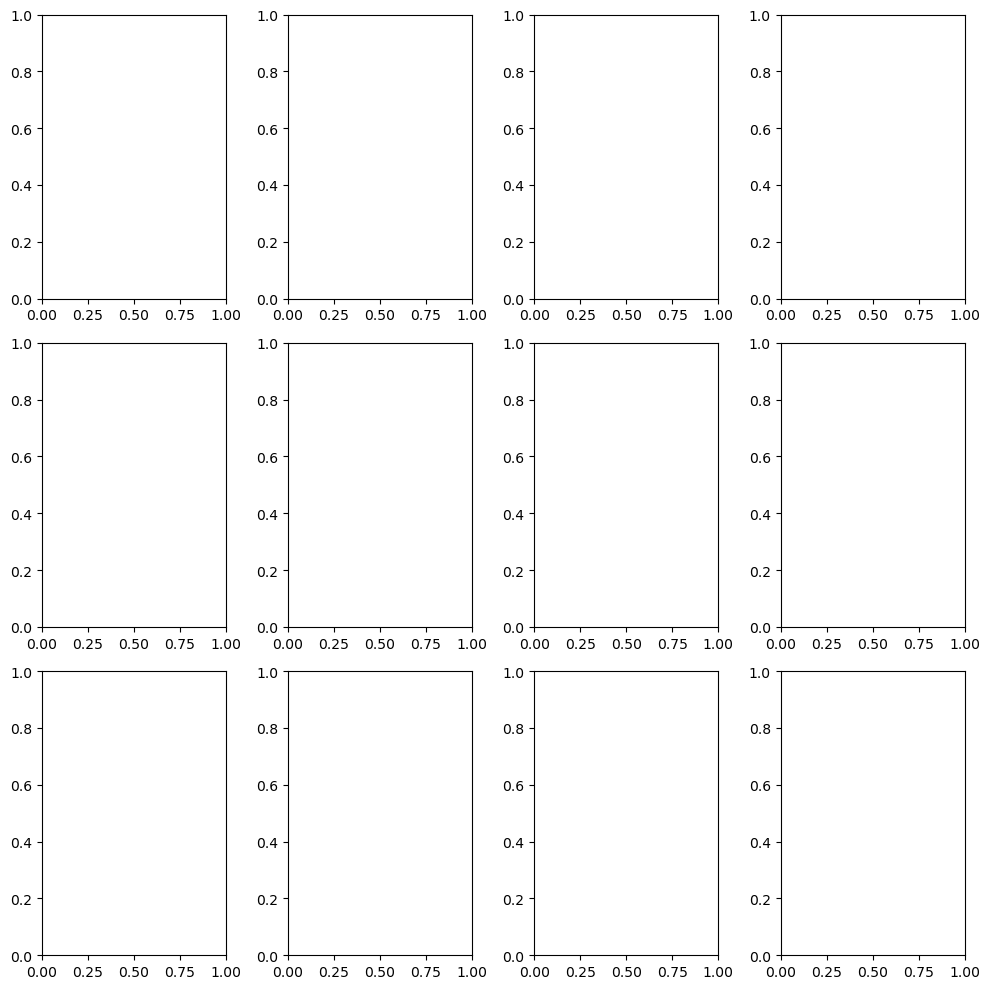

In [ ]:
# plot_cond_tar_images('1000 steps', 'data/sunrise.png')
# plot_cond_tar_images('000_features', 'data/sunrise.png')

cond_dir = os.path.join('../../results/old-fourier-features', "conditions")

plot_cond_tar_images('000_features', 'data/skull.png')

In [ ]:
import re
from IPython.display import display
from PIL import Image
from norm import read_norm_data
from sgd_weights import sgd_weights
from analysis_util import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cond_dir = os.path.join(results_path, "conditions")

 


In [ ]:
cppns, inputs, configs, targets = get_cppns('best')

TypeError: get_cppns() missing 1 required positional argument: 'cond_dir'

In [ ]:
from bloat_then_prune import *
import traceback

def bloat_prune_best(target, condition):
    try:
        config = configs[target][condition]
        config.device = device
        target_image = targets[target][condition]
        norm = read_norm_data(os.path.join("../", config.norm_df_path), config.target_name)
        cppn = cppns[target][condition].clone(config, new_id=False)
        input = inputs[target][condition]
        ratio, cppn_after = test_bloat_prune(cppn, target_image, config, input, norm, True, 0, True, 1e-2)
        image_after = cppn_after(input)
        return cppn_after, image_after
    except Exception as e:
        print(e)
        print("No results for that condition and target")
        traceback.print_exc()
        return None, None
    


In [ ]:
images = {}
sgd_cppns = {}

data/dolphin.png 0.30000_lr_sigma


Pruned 2 connections
Pruned 0 nodes
Min weight: 0.021913321688771248


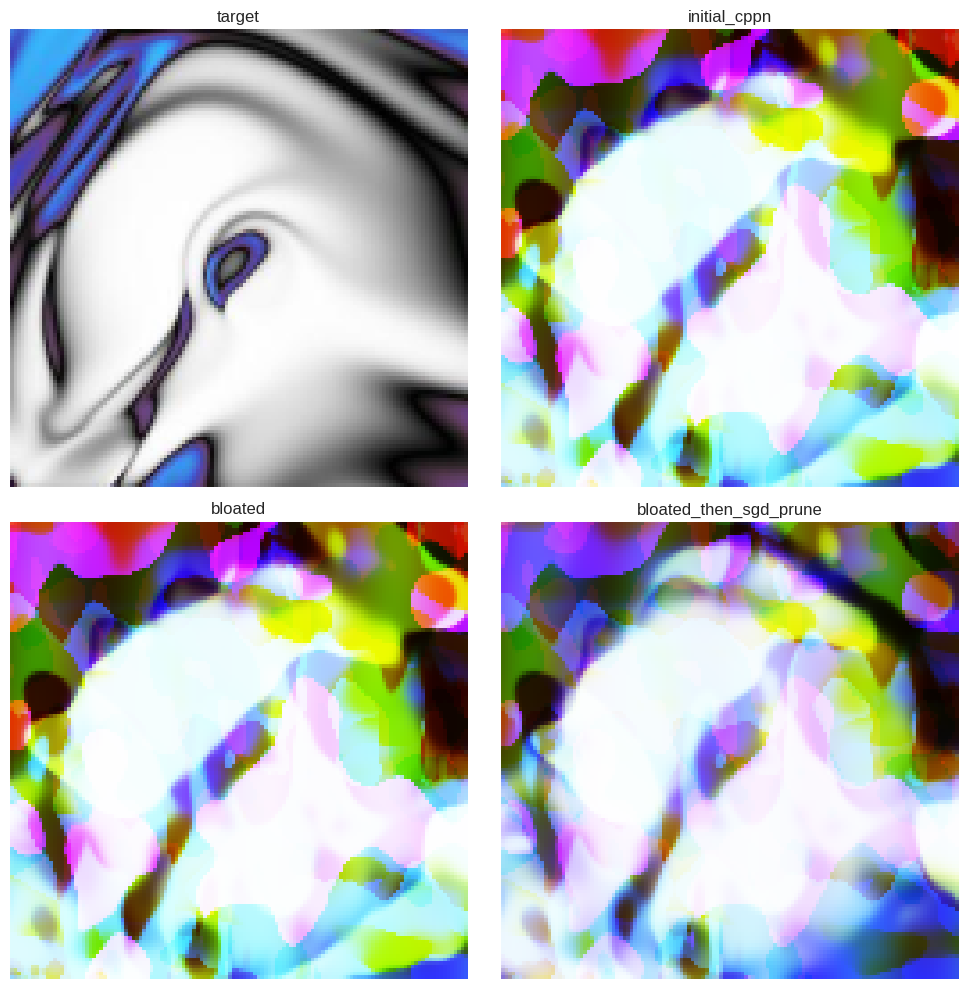


initial: 		103 nodes, 425 connections
bloated: 		103 nodes, 425 connections
bloated_pruned: 	103 nodes, 423 connections

Shared cxs initial : bloated				425
Shared cxs bloated : bloated_pruned			423
Shared cxs initial : bloated_pruned			423
Pruned from added / total pruned			0 / 2
--------------------------------------------------------------------------------
data/dolphin.png 0.00030_lr_sigma


Pruned 2 connections
Pruned 0 nodes
Min weight: 0.013602932915091515


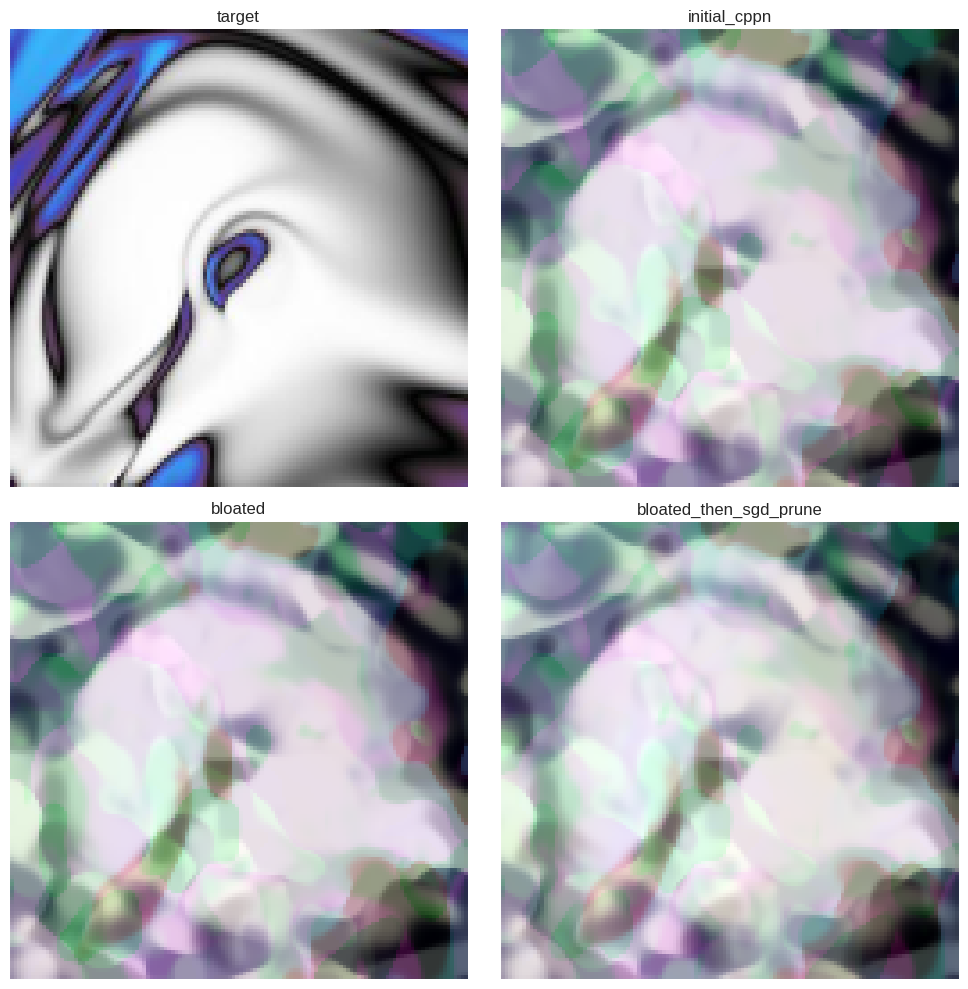


initial: 		114 nodes, 500 connections
bloated: 		114 nodes, 500 connections
bloated_pruned: 	114 nodes, 498 connections

Shared cxs initial : bloated				500
Shared cxs bloated : bloated_pruned			498
Shared cxs initial : bloated_pruned			498
Pruned from added / total pruned			0 / 2
--------------------------------------------------------------------------------
data/dolphin.png 0.03000_lr_sigma


In [ ]:

for t in results.target.unique():
    for c in results.condition.sort_values().unique():
        print(t, c)
        sgd_cppns[(t,c)], images[(t,c)] = bloat_prune_best(t,c)



In [ ]:
print(sgd_cppns)

In [ ]:
images = {}
for (t,c), cppn in sgd_cppns.items():
    if cppn is None:
        continue
    images[(t,c)] = cppn(inputs[t][c], channel_first=False).detach().cpu().numpy()
    if 'skull' in t:
        images[(t,c)] = 1.0-np.clip(images[(t,c)], 0, 1) # L got inverted for some reason TODO: why?

In [ ]:
# plot as grid
fig, axes = plt.subplots(nrows=(results.target.unique()).shape[0], ncols=(results.condition.unique()).shape[0]+1, figsize=(10, 10))

tars = results.target.unique()

# add the initial target image to the first column
print(os.getcwd())
tar_images = [os.path.join("../", f"{t}") for t in tars]

for i, img in enumerate(tar_images):
    ax = axes[i][0]
    ax.set_title(f"Target")
    ax.axis('off')
    img =Image.open(img)
    # numpy
    img = np.array(img)/255
    img = resize_image(img, (100,100), 'cpu')
    
    ax.imshow(img)

for i, tar in enumerate(tars):
    for j, cond in enumerate(results.condition.sort_values().unique()):
        ax = axes[i][j+1]
        ax.set_title(f"{cond}")
        ax.axis('off')
        if (tar, cond) not in images:
            continue
        ax.imshow(images[(tar, cond)])

plt.tight_layout()

plt.show()


In [ ]:
final_cppns = {}
pruned = {}
for t,c in images.keys():
    if (t,c) not in images:
        continue
    norm = read_norm_data(os.path.join("../", configs[t][c].norm_df_path), configs[t][c].target_name)
    pruned[(t,c)] = show_prune_effect(sgd_cppns[(t,c)],  configs[t][c], inputs[t][c], targets[t][c], norm, 0)
    final_cppns[(t,c)] = pruned[(t,c)][-1]
    

In [ ]:
# plot as grid
fig, axes = plt.subplots(nrows=(results.target.unique()).shape[0], ncols=(results.condition.unique()).shape[0]+1, figsize=(10, 10))

tars = results.target.unique()

# add the initial target image to the first column
print(os.getcwd())
tar_images = [os.path.join("../", f"{t}") for t in tars]

for i, img in enumerate(tar_images):
    ax = axes[i][0]
    ax.set_title(f"Target")
    ax.axis('off')
    img =Image.open(img)
    # numpy
    img = np.array(img)/255
    img = resize_image(img, (100,100), 'cpu')
    
    ax.imshow(img)

for i, tar in enumerate(tars):
    for j, cond in enumerate(results.condition.sort_values().unique()):
        ax = axes[i][j+1]
        ax.set_title(f"{cond}")
        ax.axis('off')
        if (tar, cond) not in images:
            continue
        final_image = final_cppns[(tar, cond)](inputs[tar][cond], channel_first=False).detach().cpu().numpy()
        ax.imshow(final_image)

plt.tight_layout()

plt.show()


## LEARNING RATE BY OBJECTIVE FUNCTION

In [ ]:
metrics = ['lr_by_batch']
lr_results = read_tensor_results(results_path, metrics, 
                              max_runs=None, reduce=False, only_final=False)

fns = [
    "psnr",
    "mse",
    "lpips",
    "dists",
    "ssim",
    "haarpsi",
    "vif",
    "msssim",
    "dss",
    "gmsd"
],




lr_results

Loading:   0%|          | 0/1 [00:00<?, ?it/s]

Merging: 100%|██████████| 64/64 [00:00<00:00, 203.34it/s]


,cell,lr_by_batch,condition,run,target
0,psnr_ssim_haarpsi,0.499445,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png
1,vif_msssim_dss,0.206979,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png
2,dists_vif_gmsd,0.977339,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png
3,mse_vif_msssim,1.235140,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png
4,lpips_ssim_gmsd,1.223633,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png
...,...,...,...,...,...
3245,psnr_mse_ssim,0.030000,0.00000_lr_sigma,run_12015061981534687726,data/dolphin.png
3246,psnr_mse_lpips,0.030000,0.00000_lr_sigma,run_12015061981534687726,data/dolphin.png
3247,haarpsi_msssim_dss,0.030000,0.00000_lr_sigma,run_12015061981534687726,data/dolphin.png
3248,lpips_dss_gmsd,0.030000,0.00000_lr_sigma,run_12015061981534687726,data/dolphin.png


In [ ]:
# barplot by function (functions are in the cell column, ie each cell is function1_function2_function3)
# make a new column for each function, and split the cell column into multiple columns
lr_results = lr_results.join(lr_results.cell.str.split("_", expand=True).add_prefix("function_"))
lr_results

,cell,lr_by_batch,condition,run,target,function_0,function_1,function_2
0,psnr_ssim_haarpsi,0.499445,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png,psnr,ssim,haarpsi
1,vif_msssim_dss,0.206979,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png,vif,msssim,dss
2,dists_vif_gmsd,0.977339,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png,dists,vif,gmsd
3,mse_vif_msssim,1.235140,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png,mse,vif,msssim
4,lpips_ssim_gmsd,1.223633,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png,lpips,ssim,gmsd
...,...,...,...,...,...,...,...,...
3245,psnr_mse_ssim,0.030000,0.00000_lr_sigma,run_12015061981534687726,data/dolphin.png,psnr,mse,ssim
3246,psnr_mse_lpips,0.030000,0.00000_lr_sigma,run_12015061981534687726,data/dolphin.png,psnr,mse,lpips
3247,haarpsi_msssim_dss,0.030000,0.00000_lr_sigma,run_12015061981534687726,data/dolphin.png,haarpsi,msssim,dss
3248,lpips_dss_gmsd,0.030000,0.00000_lr_sigma,run_12015061981534687726,data/dolphin.png,lpips,dss,gmsd


In [ ]:
# Melting the DataFrame
melted_df = lr_results.melt(id_vars=['cell', 'lr_by_batch', 'condition', 'run', 'target'], 
                    value_vars=['function_0', 'function_1', 'function_2'], 
                    var_name='function', 
                    value_name='value')
# Optional: Rename 'function' values for clarity
melted_df['function'] = melted_df['value']
melted_df.drop('value', axis=1, inplace=True)
melted_df

,cell,lr_by_batch,condition,run,target,function
0,psnr_ssim_haarpsi,0.499445,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png,psnr
1,vif_msssim_dss,0.206979,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png,vif
2,dists_vif_gmsd,0.977339,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png,dists
3,mse_vif_msssim,1.235140,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png,mse
4,lpips_ssim_gmsd,1.223633,0.30000_lr_sigma,run_11970315809654116846,data/dolphin.png,lpips
...,...,...,...,...,...,...
9745,psnr_mse_ssim,0.030000,0.00000_lr_sigma,run_12015061981534687726,data/dolphin.png,ssim
9746,psnr_mse_lpips,0.030000,0.00000_lr_sigma,run_12015061981534687726,data/dolphin.png,lpips
9747,haarpsi_msssim_dss,0.030000,0.00000_lr_sigma,run_12015061981534687726,data/dolphin.png,dss
9748,lpips_dss_gmsd,0.030000,0.00000_lr_sigma,run_12015061981534687726,data/dolphin.png,gmsd


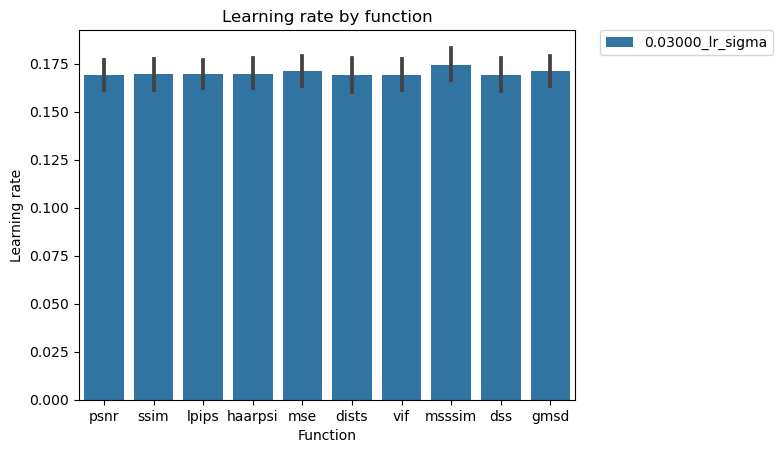

In [ ]:

plot_df = melted_df.copy()
plot_df = plot_df[plot_df['condition'] == '0.03000_lr_sigma']
# plot_df = plot_df[plot_df['target'] == 'data/sunrise.png']

sns.barplot(data=plot_df, x='function', y='lr_by_batch', hue='condition')
plt.title("Learning rate by function")
plt.xlabel("Function")
plt.ylabel("Learning rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.path.join(save_path, "lr_by_function.pdf"), bbox_inches='tight')
plt.show()

In [ ]:
raise("Stop")

TypeError: exceptions must derive from BaseException

In [ ]:
hc_results_path = "../../results/hillclimber-32"


In [ ]:
metrics = ['normed_fitness_by_batch', 'evals_by_batch']

In [ ]:
move_results = read_tensor_results(results_path, metrics,
                              fns = [
                                    "psnr",
                                    "mse",
                                    "lpips",
                                    "dists",
                                    "ssim",
                                    "haarpsi",
                                    "vif",
                                    "msssim",
                                    "dss",
                                    "gmsd"
                                ],
                              max_runs=None)




hc_results = read_tensor_results(hc_results_path, metrics, max_runs=None)

Merging: 100%|██████████| 135/135 [00:01<00:00, 67.65it/s]


In [ ]:
hc_results['function'] = hc_results['condition']
hc_results['condition'] = 'hillclimber'
hc_results['function'] = hc_results['function'].apply(lambda x: x+'_normed')
hc_results

,batch,condition,evals_by_batch,normed_fitness_by_batch,run,target,function
0,0,hillclimber,707.0,0.278436,run_18395467639002305006,data/apple.png,lpips_normed
1,1,hillclimber,1414.0,0.331111,run_18395467639002305006,data/apple.png,lpips_normed
2,2,hillclimber,2121.0,0.375162,run_18395467639002305006,data/apple.png,lpips_normed
3,3,hillclimber,2828.0,0.418375,run_18395467639002305006,data/apple.png,lpips_normed
4,4,hillclimber,3535.0,0.458463,run_18395467639002305006,data/apple.png,lpips_normed
...,...,...,...,...,...,...,...
10534,192,hillclimber,98371.0,0.748904,run_18389528944772452846,data/skull.png,dists_normed
10535,193,hillclimber,98973.0,0.748904,run_18389528944772452846,data/skull.png,dists_normed
10536,194,hillclimber,99610.0,0.748904,run_18389528944772452846,data/skull.png,dists_normed
10537,195,hillclimber,99946.0,0.748904,run_18389528944772452846,data/skull.png,dists_normed


In [ ]:
move_results

,batch,condition,dists_normed,dss_normed,evals_by_batch,gmsd_normed,haarpsi_normed,lpips_normed,mse_normed,msssim_normed,psnr_normed,run,ssim_normed,target,vif_normed
0,0,move-32-features,0.104906,0.271676,707.0,0.335588,0.195880,0.275502,0.664865,0.580852,0.061752,run_13566161090886767086,0.165764,data/apple.png,0.008243
1,1,move-32-features,0.119248,0.289894,1414.0,0.260177,0.163379,0.337322,0.723464,0.613945,0.072601,run_13566161090886767086,0.183641,data/apple.png,0.012156
2,2,move-32-features,0.203904,0.341024,2121.0,0.406927,0.213505,0.324111,0.747596,0.630674,0.077793,run_13566161090886767086,0.165808,data/apple.png,0.025285
3,3,move-32-features,0.195083,0.432289,2828.0,0.458576,0.224404,0.294464,0.766097,0.648797,0.082277,run_13566161090886767086,0.195037,data/apple.png,0.036933
4,4,move-32-features,0.203952,0.384038,3535.0,0.409679,0.232847,0.302854,0.750053,0.650414,0.078468,run_13566161090886767086,0.221691,data/apple.png,0.078530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,137,move-32-features,0.479821,0.453557,97258.0,0.436756,0.320199,0.580149,0.909465,0.854500,0.136808,run_13571562312909197806,0.570251,data/dolphin.png,0.193793
1137,138,move-32-features,0.484608,0.462971,97965.0,0.441405,0.341113,0.587228,0.912420,0.859331,0.138433,run_13571562312909197806,0.578958,data/dolphin.png,0.197632
1138,139,move-32-features,0.477223,0.460808,98672.0,0.463560,0.315902,0.579563,0.913606,0.860538,0.139187,run_13571562312909197806,0.583881,data/dolphin.png,0.198769
1139,140,move-32-features,0.483100,0.461849,99379.0,0.448544,0.307666,0.579997,0.909659,0.857271,0.137126,run_13571562312909197806,0.575047,data/dolphin.png,0.200119


In [ ]:
# move_condition_filter = "100_steps_"
# move_results = move_results[move_results.condition.str.contains(move_condition_filter)]

In [ ]:
move_results.loc[:,'all-objective_normed'] = move_results.loc[:,['psnr_normed', 'mse_normed', 'lpips_normed', 'dists_normed', 'ssim_normed', 'haarpsi_normed', 'vif_normed', 'msssim_normed', 'dss_normed', 'gmsd_normed']].mean(axis=1)

In [ ]:
move_results


,batch,condition,dists_normed,dss_normed,evals_by_batch,gmsd_normed,haarpsi_normed,lpips_normed,mse_normed,msssim_normed,psnr_normed,run,ssim_normed,target,vif_normed,all-objective_normed
0,0,move-32-features,0.104906,0.271676,707.0,0.335588,0.195880,0.275502,0.664865,0.580852,0.061752,run_13566161090886767086,0.165764,data/apple.png,0.008243,0.266503
1,1,move-32-features,0.119248,0.289894,1414.0,0.260177,0.163379,0.337322,0.723464,0.613945,0.072601,run_13566161090886767086,0.183641,data/apple.png,0.012156,0.277583
2,2,move-32-features,0.203904,0.341024,2121.0,0.406927,0.213505,0.324111,0.747596,0.630674,0.077793,run_13566161090886767086,0.165808,data/apple.png,0.025285,0.313663
3,3,move-32-features,0.195083,0.432289,2828.0,0.458576,0.224404,0.294464,0.766097,0.648797,0.082277,run_13566161090886767086,0.195037,data/apple.png,0.036933,0.333396
4,4,move-32-features,0.203952,0.384038,3535.0,0.409679,0.232847,0.302854,0.750053,0.650414,0.078468,run_13566161090886767086,0.221691,data/apple.png,0.078530,0.331253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,137,move-32-features,0.479821,0.453557,97258.0,0.436756,0.320199,0.580149,0.909465,0.854500,0.136808,run_13571562312909197806,0.570251,data/dolphin.png,0.193793,0.493530
1137,138,move-32-features,0.484608,0.462971,97965.0,0.441405,0.341113,0.587228,0.912420,0.859331,0.138433,run_13571562312909197806,0.578958,data/dolphin.png,0.197632,0.500410
1138,139,move-32-features,0.477223,0.460808,98672.0,0.463560,0.315902,0.579563,0.913606,0.860538,0.139187,run_13571562312909197806,0.583881,data/dolphin.png,0.198769,0.499304
1139,140,move-32-features,0.483100,0.461849,99379.0,0.448544,0.307666,0.579997,0.909659,0.857271,0.137126,run_13571562312909197806,0.575047,data/dolphin.png,0.200119,0.496038


In [ ]:
import warnings 
warnings.filterwarnings('ignore',"A value is trying to be set on a copy of a slice from a DataFrame.")


fn_dfs = []
drop_cols = []
for col in move_results.columns:
    if not col.endswith("_normed"):
        continue
    df = move_results[[col, 'condition', 'target', 'run']]
    df.loc[:,'function'] = col
    df.loc[:,'normed_fitness_by_batch'] = df[col]
    fn_dfs.append(df)
    drop_cols.append(col)

fn_dfs = pd.concat(fn_dfs)
fn_dfs = fn_dfs.drop(columns=drop_cols)
move_results = fn_dfs
fn_dfs

/tmp/ipykernel_22338/4000155942.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'function'] = col
/tmp/ipykernel_22338/4000155942.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'normed_fitness_by_batch'] = df[col]
/tmp/ipykernel_22338/4000155942.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,condition,target,run,function,normed_fitness_by_batch
0,move-32-features,data/apple.png,run_13566161090886767086,dists_normed,0.104906
1,move-32-features,data/apple.png,run_13566161090886767086,dists_normed,0.119248
2,move-32-features,data/apple.png,run_13566161090886767086,dists_normed,0.203904
3,move-32-features,data/apple.png,run_13566161090886767086,dists_normed,0.195083
4,move-32-features,data/apple.png,run_13566161090886767086,dists_normed,0.203952
...,...,...,...,...,...
1136,move-32-features,data/dolphin.png,run_13571562312909197806,all-objective_normed,0.493530
1137,move-32-features,data/dolphin.png,run_13571562312909197806,all-objective_normed,0.500410
1138,move-32-features,data/dolphin.png,run_13571562312909197806,all-objective_normed,0.499304
1139,move-32-features,data/dolphin.png,run_13571562312909197806,all-objective_normed,0.496038


In [ ]:
hc_results.condition = pd.Categorical(hc_results.condition, categories=sort_conditions_numerically(hc_results.condition.unique()), ordered=True)
hc_results['condition_path'] = hc_results.condition.copy()


In [ ]:
all_results = pd.concat([move_results, hc_results], ignore_index=True)

In [ ]:
all_results

,condition,target,run,function,normed_fitness_by_batch,batch,evals_by_batch,condition_path
0,move-32-features,data/apple.png,run_13566161090886767086,dists_normed,0.104906,NaN,NaN,NaN
1,move-32-features,data/apple.png,run_13566161090886767086,dists_normed,0.119248,NaN,NaN,NaN
2,move-32-features,data/apple.png,run_13566161090886767086,dists_normed,0.203904,NaN,NaN,NaN
3,move-32-features,data/apple.png,run_13566161090886767086,dists_normed,0.195083,NaN,NaN,NaN
4,move-32-features,data/apple.png,run_13566161090886767086,dists_normed,0.203952,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
23085,hillclimber,data/skull.png,run_18389528944772452846,dists_normed,0.748904,192.0,98371.0,hillclimber
23086,hillclimber,data/skull.png,run_18389528944772452846,dists_normed,0.748904,193.0,98973.0,hillclimber
23087,hillclimber,data/skull.png,run_18389528944772452846,dists_normed,0.748904,194.0,99610.0,hillclimber
23088,hillclimber,data/skull.png,run_18389528944772452846,dists_normed,0.748904,195.0,99946.0,hillclimber


In [ ]:
# filter to just the max fitness for each run
max_fit_rows = all_results.groupby(['target', 'condition', 'run', 'function']).apply(lambda x: x.sort_values('normed_fitness_by_batch', ascending=False).iloc[0]).reset_index(drop=True)
max_fit_rows

,condition,target,run,function,normed_fitness_by_batch,batch,evals_by_batch,condition_path
0,hillclimber,data/apple.png,run_142245471571546606,dists_normed,0.693090,148.0,100170.0,hillclimber
1,hillclimber,data/apple.png,run_144473657655038446,gmsd_normed,0.216036,141.0,100191.0,hillclimber
2,hillclimber,data/apple.png,run_145459438548816366,all-objective_normed,0.698548,146.0,100324.0,hillclimber
3,hillclimber,data/apple.png,run_145780487354192366,dss_normed,0.589240,73.0,50806.0,hillclimber
4,hillclimber,data/apple.png,run_145903881764606446,lpips_normed,0.671652,142.0,100429.0,hillclimber
...,...,...,...,...,...,...,...,...
151,move-32-features,data/sunrise.png,run_13624414161819144686,mse_normed,0.987163,NaN,NaN,NaN
152,move-32-features,data/sunrise.png,run_13624414161819144686,msssim_normed,0.971075,NaN,NaN,NaN
153,move-32-features,data/sunrise.png,run_13624414161819144686,psnr_normed,0.249961,NaN,NaN,NaN
154,move-32-features,data/sunrise.png,run_13624414161819144686,ssim_normed,0.672665,NaN,NaN,NaN


In [ ]:
# max_fits_by_target_and_cond = all_results.groupby(['target', 'condition']).apply(lambda x: x.sort_values('normed_fitness_by_batch', ascending=False).iloc[0]).reset_index(drop=True)

<Axes: xlabel='function', ylabel='normed_fitness_by_batch'>

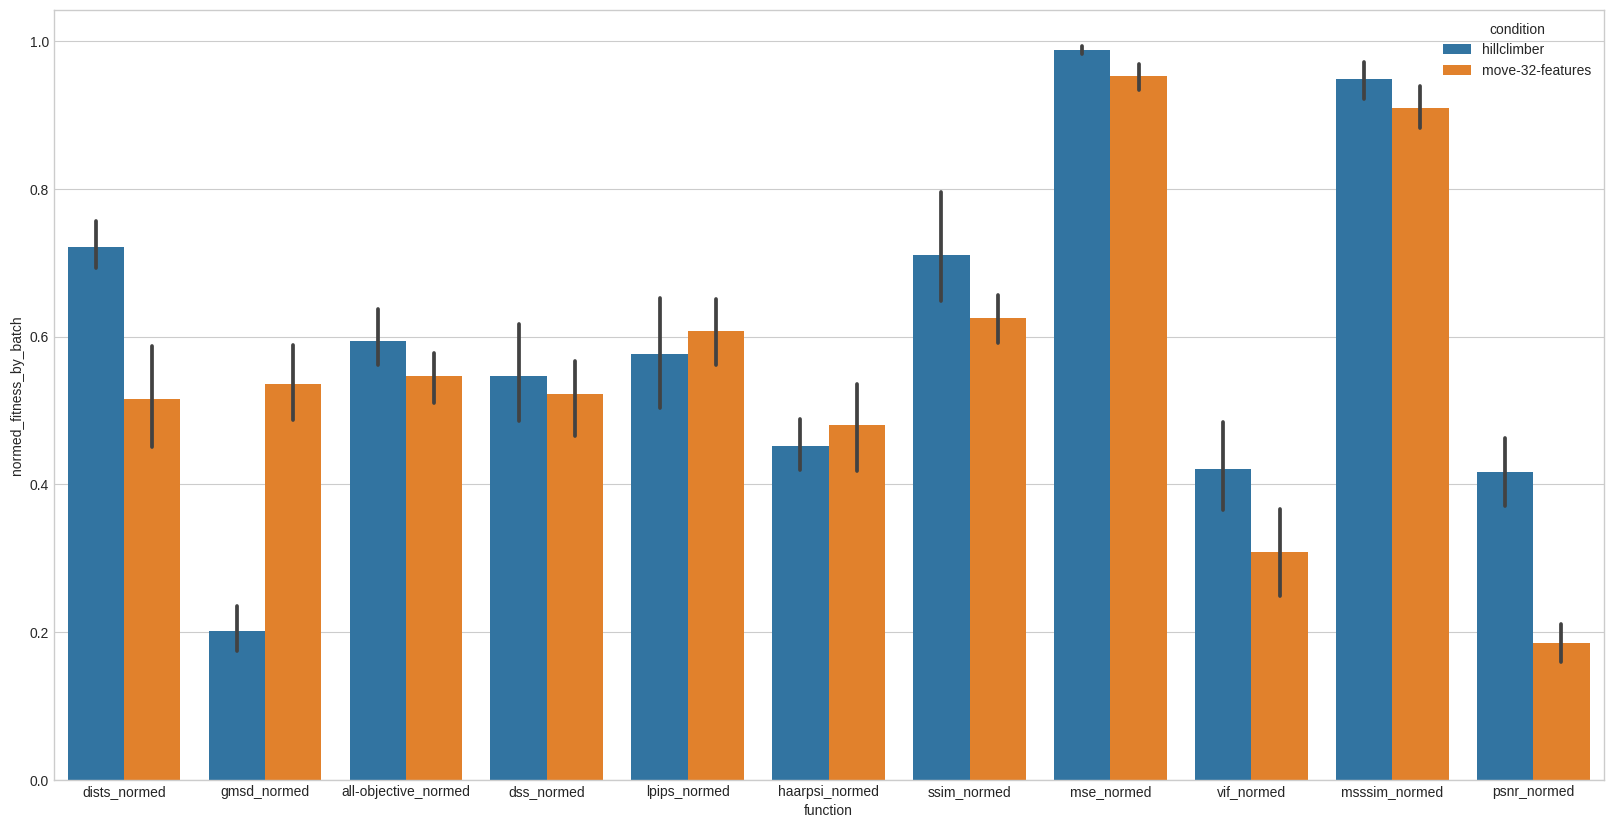

In [ ]:
ax, fig = plt.subplots(figsize=(20, 10))
sns.barplot(data=max_fit_rows, x='function', y='normed_fitness_by_batch', hue='condition')